In [ ]:
!pip install chart_studio

In [3]:
import chart_studio.plotly as py
import chart_studio
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
chart_studio.tools.set_credentials_file(username='trevordoucet', api_key='4yrcNaxr6QNxtupYLEbE')

In [4]:
file = 'Datasets/data.csv'
file_df = pd.read_csv(file)
File_df = pd.DataFrame(file_df)
File_df['Countries'].value_counts().head(25)
America = File_df.loc[(File_df['Countries'] == 'United States of America') |
                      (File_df['Countries'] == 'Mexico') |
                      (File_df['Countries'] == 'Canada') |
                      (File_df["Countries"] == 'Canada, United States of America'),:]
America.head(10)

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
68,1506,Huasteca Náhuatl,náhuatl du Huasteca,nahua de la Huasteca,Mexico,MEX,nhe,Vulnerable,Mexicano,NaN,463183.0,"Census 2000, information provided by INALI for...",21.3835,-98.9902,Locality of Xilitla and others in the municipa...
82,1503,Central Náhuatl,náhuatl central,nahua central,Mexico,MEX,"nhn, nch, ncx",Vulnerable,"Mexicano, Aztec (in English only)",NaN,395581.0,"Census 2000, information provided by INALI for...",19.1910,-99.0236,Locality of Milpa Alta and others with few rem...
156,784,Navajo,navajo,navajo,United States of America,USA,nav,Vulnerable,"Navajo, Diné",NaN,120000.0,"Platero, Paul. 2001. Navajo head start languag...",35.8044,-108.4750,the Navajo Nation is located in the region of ...
160,916,Sierra Totonac,totonaque de la Sierra,totonacano de Sierra,Mexico,MEX,tos,Severely endangered,"Highland Totonac, Totonaco central del sur",NaN,118367.0,Contributors: Carolyn MacKay and Frank Tresche...,20.2461,-97.6586,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
166,904,Phurhepecha,purepecha,purépecha,Mexico,MEX,tsz,Vulnerable,"Purépecha, Tarasco, Porhé",NaN,102988.0,Census 2000\nContributor: Claudine Chamoreau ...,19.3111,-102.0410,NaN
187,932,Mezquital Otomí,otomí de Mezquital,otomí del valle de Mezquital,Mexico,MEX,ote,Definitely endangered,"hñähñú, ñänhü, ñandú, ñohño, ñanhmu",NaN,88789.0,NaN,20.4831,-99.2170,"Ajacuba, Ixmiquilpan, San Bartolo Tutotepec, T..."
188,940,Eastern Mazahua,mazahua oriental,mazahua oriental,Mexico,MEX,NaN,Definitely endangered,jnatrjo,NaN,88001.0,"Census 2000, information provided by INALI and...",19.7129,-99.9515,"Donato Guerra, Ixtlahuaca, Jocotitlán, San Fel..."
190,928,Central Otomí,otomí central,otomí central,Mexico,MEX,NaN,Definitely endangered,"State of Mexico Otomí, hñähñú, ñöthó, ñható, h...",NaN,84593.0,"Census 2000, Lastra's research",19.4661,-99.5944,"Municipalities of Acambay, Chapa de Mota, Huix..."
228,1504,Sierra de Puebla Náhuatl,náhuatl de la Sierra de Puebla,nahua de la sierra de Puebla,Mexico,MEX,NaN,Definitely endangered,Mexicano,NaN,57189.0,"Census 2000, information provided by INALI for...",19.6223,-97.8149,"Municipalities of Chilchotla, Chichiquila, Ixt..."
251,915,Papantla Totonac,totonaque de Papantla,totonaco papantla,Mexico,MEX,top,Definitely endangered,"Lowland Totonac, Totonaco de la costa",NaN,49748.0,Contributors: Carolyn MacKay and Frank Tresche...,20.4477,-97.3200,"Cazones, Coatzintla, Espinal, Papantla, Tecolu..."


In [5]:
File_DF = America.iloc[:, [0, 1, 4, 7, 10, 12, 13, 14]]
Population_Dict = {'Mexico':126200000, 'Canada':36740000, 'United States of America':325000000, 'Canada, United States of America':361740000}
File_DF['Population'] = File_DF['Countries'].map(Population_Dict)
File_DF['Speaker Percentage'] = (File_DF['Number of speakers'] / File_DF['Population'])*100
File_DF["Speaker Percentage"] = File_DF["Speaker Percentage"].map("{:,.2f}%".format)
File_DF = File_DF[['ID', 'Name in English', 'Countries', 
                   'Number of speakers', 'Population', 'Speaker Percentage',
                  'Latitude', 'Longitude', 'Degree of endangerment', 'Description of the location']]
File_DF.set_index('ID', inplace=True)
File_DF.head(15)

C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\575684\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Name in English,Countries,Number of speakers,Population,Speaker Percentage,Latitude,Longitude,Degree of endangerment,Description of the location
ID,,,,,,,,,
1506,Huasteca Náhuatl,Mexico,463183.0,126200000,0.37%,21.3835,-98.9902,Vulnerable,Locality of Xilitla and others in the municipa...
1503,Central Náhuatl,Mexico,395581.0,126200000,0.31%,19.1910,-99.0236,Vulnerable,Locality of Milpa Alta and others with few rem...
784,Navajo,United States of America,120000.0,325000000,0.04%,35.8044,-108.4750,Vulnerable,the Navajo Nation is located in the region of ...
916,Sierra Totonac,Mexico,118367.0,126200000,0.09%,20.2461,-97.6586,Severely endangered,"Ahuacatlán, Amixtlán, Atlequizayán, Camocuautl..."
904,Phurhepecha,Mexico,102988.0,126200000,0.08%,19.3111,-102.0410,Vulnerable,NaN
932,Mezquital Otomí,Mexico,88789.0,126200000,0.07%,20.4831,-99.2170,Definitely endangered,"Ajacuba, Ixmiquilpan, San Bartolo Tutotepec, T..."
940,Eastern Mazahua,Mexico,88001.0,126200000,0.07%,19.7129,-99.9515,Definitely endangered,"Donato Guerra, Ixtlahuaca, Jocotitlán, San Fel..."
928,Central Otomí,Mexico,84593.0,126200000,0.07%,19.4661,-99.5944,Definitely endangered,"Municipalities of Acambay, Chapa de Mota, Huix..."
1504,Sierra de Puebla Náhuatl,Mexico,57189.0,126200000,0.05%,19.6223,-97.8149,Definitely endangered,"Municipalities of Chilchotla, Chichiquila, Ixt..."


In [6]:
def color_code(number):
    if (0.7 < number):
        color = 'darkblue'
    elif (number < -0.7):
        color = 'red'
    elif (number > 0) & (number < 0.7):
        color = 'purple'
    elif (number < 0):
        color = 'lightcoral'
    else:
        color = 'black'
    return 'color: %s' % color

In [43]:
#Creating New Columns based on Degree of Endangerment
#Vulnerable
Vulnerable_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
Vulnerable_DF = pd.DataFrame(Vulnerable_DF.groupby(['Countries']).count()['Population'])
Vulnerable_DF = Vulnerable_DF.rename(columns = {'Population':'Vulnerable'})
#Definitely Endangered 
Definitely_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
Definitely_Endangered_DF = pd.DataFrame(Definitely_Endangered_DF.groupby(['Countries']).count()['Population'])
Definitely_Endangered_DF = Definitely_Endangered_DF.rename(columns = {'Population':'Definitely endangered'})
#Critically Endangered
Critically_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Critically_Endangered_DF = pd.DataFrame(Critically_Endangered_DF.groupby(['Countries']).count()['Population'])
Critically_Endangered_DF = Critically_Endangered_DF.rename(columns = {'Population':'Critically endangered'})
#Severly Endangered
Severely_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Severely_Endangered_DF = pd.DataFrame(Severely_Endangered_DF.groupby(['Countries']).count()['Population'])
Severely_Endangered_DF = Severely_Endangered_DF.rename(columns = {'Population':'Severely endangered'})
#Extinct
Extinct_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Extinct'), :]) 
Extinct_DF = pd.DataFrame(File_DF.groupby(['Countries']).count()['Population'])
Extinct_DF = Extinct_DF.rename(columns = {'Population':'Extinct'})
#Merging Tables
merge_1 = pd.merge(Vulnerable_DF, Definitely_Endangered_DF, on='Countries')
merge_2 = pd.merge(Critically_Endangered_DF, Severely_Endangered_DF, on='Countries')
merge_3 = pd.merge(merge_1, merge_2, on='Countries')
Merged_DF = pd.merge(merge_3, Extinct_DF, on='Countries')
Merged_DF = Merged_DF[['Vulnerable','Definitely endangered','Severely endangered','Critically endangered','Extinct']]
Merged_DF

,Vulnerable,Definitely endangered,Severely endangered,Critically endangered,Extinct
Countries,,,,,
Canada,24,16,12,28,82
Mexico,52,38,32,21,143
United States of America,14,28,40,80,216


In [45]:
#Create New Columns 
Corr_DF = pd.DataFrame(File_DF.groupby(['Countries']).count())
Corr_DF['Vulnerable'] = Vulnerable_DF
Corr_DF["Definitely Endangered"] = Definitely_Endangered_DF
Corr_DF["Critically Endangered"] = Critically_Endangered_DF
Corr_DF["Severely Endangered"] = Severely_Endangered_DF
Corr_DF['Extinct'] = Extinct_DF
Corr_DF = Corr_DF[['Vulnerable', 'Definitely Endangered', 'Severely Endangered', 'Critically Endangered', 'Extinct','Number of speakers','Speaker Percentage']]
#Correlation between degrees of endangerment
Correlation_DF = round(Corr_DF.corr(), 2)
Correlation_DF = pd.DataFrame(Correlation_DF[['Number of speakers','Speaker Percentage']])
Correlation_DF.drop(Correlation_DF.tail(2).index,inplace=True)
Corr_df = Correlation_DF.style.applymap(color_code)
Corr_df

,Number of speakers,Speaker Percentage
Vulnerable,-0.210000,-0.300000
Definitely Endangered,0.830000,0.820000
Severely Endangered,0.990000,0.970000
Critically Endangered,0.860000,0.890000
Extinct,1.000000,1.000000


In [46]:
#Create New Columns
America = File_DF[(File_DF['Countries'] == "United States of America")]
Canada = File_DF[(File_DF['Countries'] == 'Canada')]
Mexico = File_DF[(File_DF['Countries'] == 'Mexico')]
Canada_America = File_DF[(File_DF['Degree of endangerment'] == 'Canada, United States of America')]
#Group By Degree of Endangerment
America = America.groupby(['Degree of endangerment']).count()['Population']
Canada = Canada.groupby(['Degree of endangerment']).count()['Population']
Mexico = Mexico.groupby(['Degree of endangerment']).count()['Population']
Canada_America = Canada_America.groupby(['Degree of endangerment']).count()['Population']
#Create New Columns 
Country_DF = pd.DataFrame(File_DF.groupby(['Degree of endangerment']).count())
Country_DF['America'] = America
Country_DF["Canada"] = Canada
Country_DF["Mexico"] = Mexico
Country_DF["Canada_America"] = Canada_America
Country_DF = Country_DF[['America', 'Canada', 'Mexico']]
# Correlaion Between Countries
Country_DF = round(Country_DF.corr(), 2)
Country_df = Country_DF.style.applymap(color_code)
Country_df

,America,Canada,Mexico
America,1.000000,0.070000,-0.940000
Canada,0.070000,1.000000,-0.110000
Mexico,-0.940000,-0.110000,1.000000


Text(0.5, 1.0, 'Countries Endangerment Level Comparison')

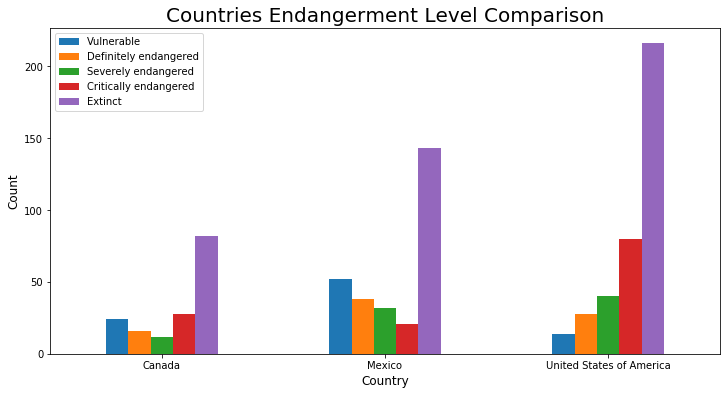

In [47]:
#Create a Bar Plot of all four endangerment levels 
Merged_DF.plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Countries Endangerment Level Comparison',fontsize=20)

([<matplotlib.patches.Wedge at 0x1c447ae6608>,
 [Text(-1.2231874010436614, 0.2575122947124139, 'Critically endangered'),
  Text(-0.9109523728024644, -0.6165758464986768, 'Definitely endangered'),
  Text(0.9334927880984718, -0.5818859119863118, 'Extinct'),
  Text(0.14415500010529195, 1.0905133359774393, 'Severely endangered'),
  Text(-0.5564285385403409, 0.9488873913683649, 'Vulnerable')],
 [Text(-0.7339124406261968, 0.15450737682744828, '15.6%'),
  Text(-0.49688311243770783, -0.3363140980901873, '9.9%'),
  Text(0.5091778844173482, -0.3173923156288973, '53.4%'),
  Text(0.07863000005743195, 0.5948254559876941, '10.2%'),
  Text(-0.30350647556745863, 0.5175749407463808, '10.9%')])

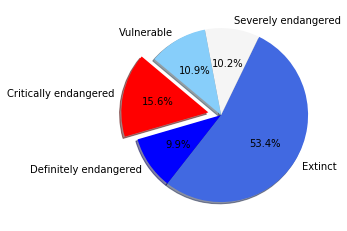

In [23]:
#United States Pie Chart
labels = ["Critically endangered", "Definitely endangered", "Extinct", "Severely endangered", "Vulnerable"]
sizes = [129, 82, 441, 84, 90]
colors = ["red", "blue", "royalblue", "whitesmoke", "lightskyblue"]
explode = (0.15,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1c448a05108>,
 [Text(-1.1158973171994855, 0.5632700750678942, 'Critically endangered'),
  Text(-1.0821026997927046, -0.19762020924323564, 'Definitely endangered'),
  Text(0.6193350664138478, -0.9090786959940018, 'Extinct'),
  Text(0.6402479600729795, 0.8944733364513381, 'Serverely endangered'),
  Text(-0.32661239498022193, 1.0503924711484196, 'Vulnerable')],
 [Text(-0.6695383903196912, 0.33796204504073646, '7.3%'),
  Text(-0.590237836250566, -0.10779284140540125, '13.3%'),
  Text(0.3378191271348261, -0.49586110690581914, '50.0%'),
  Text(0.34922616003980694, 0.48789454715527525, '11.2%'),
  Text(-0.1781522154437574, 0.572941347899138, '18.2%')])

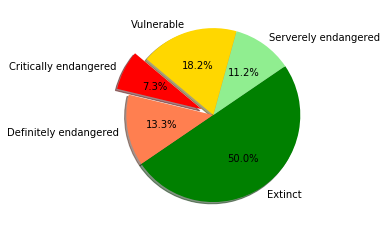

In [38]:
#Mexico Pie Chart
labels = ["Critically endangered", "Definitely endangered", "Extinct","Serverely endangered", "Vulnerable"]
sizes = [21, 38, 143, 32, 52]
colors = ["red","coral", "green", "lightgreen", "gold"]
explode = (0.15,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1c4487f5cc8>,
 [Text(-1.234987312627413, 0.19314848601353576, 'Critically endangered'),
  Text(-0.8426488800752838, -0.7070663794212466, 'Definitely endangered'),
  Text(0.9417835901402632, -0.568369307178455, 'Extinct'),
  Text(0.31548356511764436, 1.0537884608120651, 'Severely endangered'),
  Text(-0.4356877391406074, 1.0100377190791174, 'Vulnerable')],
 [Text(-0.7409923875764477, 0.11588909160812144, '17.3%'),
  Text(-0.4596266618592456, -0.3856725705934072, '9.9%'),
  Text(0.5137001400765071, -0.3100196220973391, '50.6%'),
  Text(0.1720819446096242, 0.57479370589749, '7.4%'),
  Text(-0.23764785771305855, 0.5509296649522458, '14.8%')])

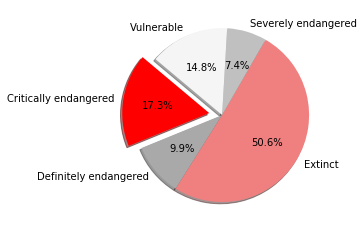

In [41]:
#Canada Pie Chart
labels = ["Critically endangered", "Definitely endangered","Extinct", "Severely endangered", "Vulnerable"]
sizes = [28,16,82,12,24]
colors = ["red", "darkgray", "lightcoral", "silver", "whitesmoke"]
explode = (0.15,0,0,0,0)
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

Text(0.5, 1.0, 'Average Number of Speakers by Vitality Level')

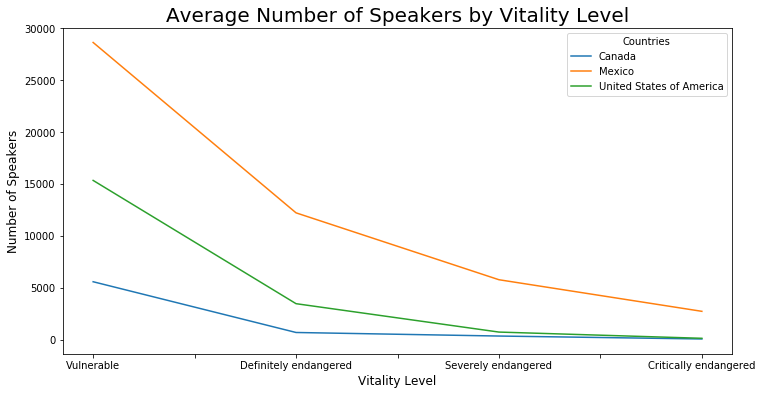

In [30]:
Vuln_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
Vuln_DF = round(pd.DataFrame(Vuln_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Vuln_DF = Vuln_DF.rename(columns = {'Number of speakers':'Vulnerable'})
#Definitely Endangered 
Def_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
Def_DF = round(pd.DataFrame(Def_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Def_DF = Def_DF.rename(columns = {'Number of speakers':'Definitely endangered'})
#Severly Endangered
Sev_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Sev_DF = round(pd.DataFrame(Sev_DF.groupby(['Countries']).mean()['Number of speakers']),1)
Sev_DF = Sev_DF.rename(columns = {'Number of speakers':'Severely endangered'})
Sev_DF
#Critically Endangered
Crit_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Crit_DF = round(pd.DataFrame(Crit_DF.groupby(['Countries']).mean()['Number of speakers']),1)
#Crit_DF = pd.DataFrame(Crit_DF.groupby(['Countries']).count()['Number of speakers'])
Crit_DF = Crit_DF.rename(columns = {'Number of speakers':'Critically endangered'})
Crit_DF
#Merging Tables
speak_1 = pd.merge(Vuln_DF, Def_DF, on='Countries')
speak_2 = pd.merge(Crit_DF, Sev_DF, on='Countries')
speakers_DF = pd.merge(speak_1, speak_2, on='Countries')
#
#speakers_DF
#
speakers_DF = speakers_DF[['Vulnerable','Definitely endangered','Severely endangered','Critically endangered']]
speakers_DF = speakers_DF.transpose()
speakers_DF
#speakers_DF.plot(rot=90)
speakers_DF.plot(kind='line', figsize=(12, 6), rot=0)
plt.xlabel('Vitality Level',fontsize=12)
plt.ylabel('Number of Speakers',fontsize=12)
plt.title("Average Number of Speakers by Vitality Level",fontsize=20)

In [31]:
#Describe Data
Vulnmin_DF = File_DF.groupby(['Countries'])
Vulnmin_DF = Vulnmin_DF['Number of speakers']
Vulnmin_DF.describe()

,count,mean,std,min,25%,50%,75%,max
Countries,,,,,,,,
Canada,63.0,2326.126984,3935.613599,0.0,135.00,570.0,3222.50,20933.0
"Canada, United States of America",8.0,552.500000,626.446897,130.0,168.75,345.0,558.75,2000.0
Mexico,141.0,15154.673759,53880.046224,3.0,312.00,1074.0,7977.00,463183.0
United States of America,207.0,1659.067633,8797.779579,0.0,1.00,25.0,425.00,120000.0


In [32]:
scope = ["United States of America"]
united_only = America[America["Countries"].isin(scope)]
united_only.head(5)
rename = America.rename(columns={"Degree of endangerment": "degree"})
rename.head(5)
data = [dict(type ='scattergeo', locationmode = 'USA-states', lon = America["Longitude"], lat = America["Latitude"], text = America[["Number of speakers", "Name in English"]],
               marker = dict(size=12, autocolorscale=False, colorscale='picnic', color=united_only["Number of speakers"],
                            colorbar=dict(title = 'Speakers')))]
layout = dict(title='Speaker Count per Language', geo = dict(scope='usa', projection=dict(type='albers usa'), showland=True, landcolor= 'rgb(250,250,250)',
                            subunitcolor = 'rgb(217,217,217)', countrycolor = 'rgb(217,217,217)', countrywidth = 0.5),)
fig = dict(data=data, layout=layout)
py.plot(fig)

KeyError: 'Countries'